<a href="https://colab.research.google.com/github/DerrickStein/hello-world/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.2/978.2 kB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.6/300.6 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566166 sha256=ee415e71198b6677b9acdca9e9952832a70f849e23051e0baa2ce7c50d6db2b6
  Stored in directory: /root/.cache/pip/wheels/8f/47/c8/f44c5aebb7507f7c8a2c0bd23151d732d0f0bd6884ad4ac635
Successfully built face-recognition-models
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.2/169.2 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.0/170.0

26-02-02 14:08:40 - Directory /root/.deepface has been created
26-02-02 14:08:40 - Directory /root/.deepface/weights has been created
Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

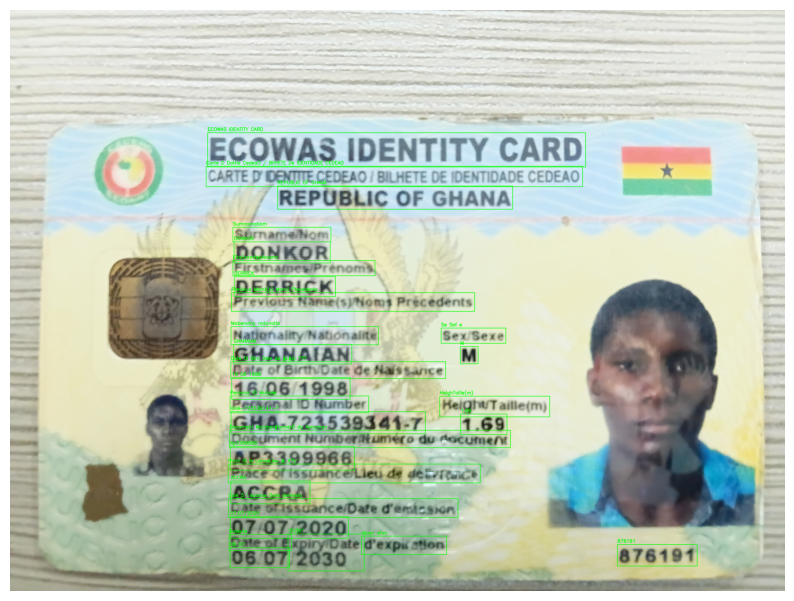

Detected text and confidence scores:
Text: ECOWAS IDENTITY CARD, Confidence: 0.9761
Text: Carte D Dattie CedeaO / BilHETE De IDENTIDADE CEDEAO, Confidence: 0.0681
Text: REPUBLIC OF GHANA, Confidence: 0.8695
Text: Sumnamatiom, Confidence: 0.1881
Text: DONKOR, Confidence: 0.5442
Text: Firs(namfepfenomt, Confidence: 0.0654
Text: DERRiCK, Confidence: 0.8517
Text: Ptevious Mamt(s) Mom} Ptecedents, Confidence: 0.0526
Text: Mabenalny natonalte, Confidence: 0.3250
Text: Se Sef e, Confidence: 0.1241
Text: GHANAIAN, Confidence: 0.9868
Text: M, Confidence: 0.9579
Text: Date 0l Birn Dele de #L#ic €, Confidence: 0.0505
Text: 16 06 1998, Confidence: 0.8496
Text: Penionai ID Muindei, Confidence: 0.0434
Text: HeighTaille(m), Confidence: 0.4193
Text: GHA-723539141-7, Confidence: 0.6037
Text: 1.69, Confidence: 0.9995
Text: Document Mumber#tumer0 du Aocuman, Confidence: 0.2375
Text: Ap3399966, Confidence: 0.6302
Text: Piact 0l is LanceLieu & 47c', Confidence: 0.0219
Text: ACCRA, Confidence: 0.9526
Text: 

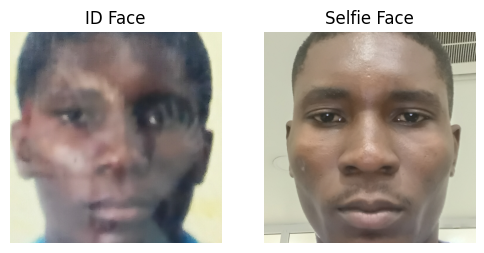

26-02-02 14:09:48 - 🔗 facenet_weights.h5 will be downloaded from https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5 to /root/.deepface/weights/facenet_weights.h5...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5
To: /root/.deepface/weights/facenet_weights.h5
100%|██████████| 92.2M/92.2M [00:00<00:00, 388MB/s]


Histogram similarity: 0.4309
LBP similarity: 0.9387
DeepFace similarity: 0.5113
Final extracted data: {'name': 'DERRICK DONKOR', 'id_number': 'GHA-723539141-71.69', 'date_of_birth': '16/06/1998', 'expiry_date': '06/07/2036', 'face_match_percentage': 0.9387}


In [1]:
#####################################
#      INSTALL REQUIRED LIBRARIES   #
#####################################

!pip install easyocr
!pip install opencv-python numpy face-recognition
!pip install deepface

#####################################
#              IMPORTS              #
#####################################

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.spatial.distance import cosine
from skimage.metrics import structural_similarity as ssim
import easyocr
from deepface import DeepFace

# Disable GPU for compatibility
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

#####################################
#           OCR EXTRACTION           #
#####################################

def extract_text_from_image(image_path, display=True):
    """
    Extract text from ID image using EasyOCR
    """
    reader = easyocr.Reader(['en'])
    result = reader.readtext(image_path)

    # Combine text for AI prompt
    strl = [text for (_, text, _) in result]
    full_text = "".join(strl)

    if display:
        # Display image with bounding boxes
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        for (bbox, text, prob) in result:
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = tuple(map(int, top_left))
            bottom_right = tuple(map(int, bottom_right))
            cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 2)
            cv2.putText(img, text, (top_left[0], top_left[1] - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
        plt.figure(figsize=(10, 10))
        plt.imshow(img)
        plt.axis('off')
        plt.show()

    # Print OCR results
    print("Detected text and confidence scores:")
    for (_, text, prob) in result:
        print(f"Text: {text}, Confidence: {prob:.4f}")

    return full_text

# Example usage
image_path = 'sample_data/sample_id.jpg'
full_text = extract_text_from_image(image_path)

#####################################
#      FACE EXTRACTION FUNCTION      #
#####################################

def extract_face(image):
    """
    Extract the largest face from an image using OpenCV Haar Cascades
    """
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +
                                         "haarcascade_frontalface_default.xml")
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5, minSize=(60,60))

    if len(faces) == 0:
        return None

    x, y, w, h = max(faces, key=lambda f: f[2]*f[3])
    return image[y:y+h, x:x+w]

# Load ID and selfie images
img_id = cv2.imread('sample_data/sample_id.jpg')
img_id = cv2.cvtColor(img_id, cv2.COLOR_BGR2RGB)
img_selfie = cv2.imread('sample_data/selfie.jpg')
img_selfie = cv2.cvtColor(img_selfie, cv2.COLOR_BGR2RGB)

# Extract faces
face_id = extract_face(img_id)
face_selfie = extract_face(img_selfie)

# Display extracted faces
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(face_id)
plt.title("ID Face")
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(face_selfie)
plt.title("Selfie Face")
plt.axis('off')
plt.show()

#####################################
#       FACE SIMILARITY METHODS     #
#####################################

def face_similarity_histogram(face1, face2):
    if face1 is None or face2 is None:
        return None
    face1 = cv2.resize(face1, (128,128))
    face2 = cv2.resize(face2, (128,128))
    gray1 = cv2.cvtColor(face1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(face2, cv2.COLOR_BGR2GRAY)
    hist1 = cv2.calcHist([gray1],[0],None,[256],[0,256])
    hist2 = cv2.calcHist([gray2],[0],None,[256],[0,256])
    cv2.normalize(hist1, hist1, 0,1, cv2.NORM_MINMAX)
    cv2.normalize(hist2, hist2, 0,1, cv2.NORM_MINMAX)
    return round(float(cv2.compareHist(hist1,hist2,cv2.HISTCMP_CORREL)),4)

def face_similarity_lbp(face1, face2):
    if face1 is None or face2 is None:
        return None

    face1 = cv2.resize(face1, (128,128))
    face2 = cv2.resize(face2, (128,128))
    gray1 = cv2.cvtColor(face1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(face2, cv2.COLOR_BGR2GRAY)

    def compute_lbp(image):
        lbp = np.zeros_like(image)
        for i in range(1,image.shape[0]-1):
            for j in range(1,image.shape[1]-1):
                center = image[i,j]
                code = 0
                code |= (image[i-1,j-1]>=center)<<7
                code |= (image[i-1,j]>=center)<<6
                code |= (image[i-1,j+1]>=center)<<5
                code |= (image[i,j+1]>=center)<<4
                code |= (image[i+1,j+1]>=center)<<3
                code |= (image[i+1,j]>=center)<<2
                code |= (image[i+1,j-1]>=center)<<1
                code |= (image[i,j-1]>=center)<<0
                lbp[i,j]=code
        return lbp

    lbp1 = compute_lbp(gray1)
    lbp2 = compute_lbp(gray2)

    hist1, _ = np.histogram(lbp1.ravel(), bins=256, range=(0,256))
    hist2, _ = np.histogram(lbp2.ravel(), bins=256, range=(0,256))

    hist1 = hist1 / (hist1.sum()+1e-6)
    hist2 = hist2 / (hist2.sum()+1e-6)

    return round(float(1-cosine(hist1,hist2)),4)

def face_similarity_deepface(face1, face2, model_name='Facenet'):
    if face1 is None or face2 is None:
        return None
    face1 = cv2.resize(face1,(160,160))
    face2 = cv2.resize(face2,(160,160))
    temp1, temp2 = "temp1.jpg","temp2.jpg"
    cv2.imwrite(temp1,face1)
    cv2.imwrite(temp2,face2)
    try:
        result = DeepFace.verify(temp1,temp2,model_name=model_name,
                                 enforce_detection=False, detector_backend='opencv',
                                 distance_metric='cosine')
        distance = result['distance']
        similarity = 1-distance
    except Exception as e:
        print(f"DeepFace error: {e}")
        similarity = None
    finally:
        for f in [temp1,temp2]:
            if os.path.exists(f): os.remove(f)
    return round(similarity,4) if similarity is not None else None

# Compute similarities
sim_hist = face_similarity_histogram(face_id, face_selfie)
sim_lbp  = face_similarity_lbp(face_id, face_selfie)
sim_df   = face_similarity_deepface(face_id, face_selfie)

print("Histogram similarity:", sim_hist)
print("LBP similarity:", sim_lbp)
print("DeepFace similarity:", sim_df)

# Pick the highest similarity
face_match_percentage = round(max(filter(None,[sim_hist,sim_lbp,sim_df])),4)

#####################################
#       FINAL DATA STRUCTURE        #
#####################################

# Using Google Colab AI to extract structured data from OCR text
import google.colab.ai as ai

fullname = ai.generate_text(f"Get just full name from this: {full_text}")
id_number = ai.generate_text(f"Get just Personal ID number from this: {full_text}")
date_of_birth = ai.generate_text(f"Get just date of birth from this: {full_text} with a date format")
expiry_date = ai.generate_text(f"Get just expiry date from this: {full_text} with a date format")

data = {
    "name": fullname,
    "id_number": id_number,
    "date_of_birth": date_of_birth,
    "expiry_date": expiry_date,
    "face_match_percentage": face_match_percentage
}

print("Final extracted data:", data)
